<center><font size="12">HOUSE PRICE PREDICTION<font><center>

![Image](https://www.rd.com/wp-content/uploads/2017/10/Upside-Down-Houses-That-Will-Make-You-Look-Twice-courtesy-@nightrav3n-FT.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import Image
from IPython.core.display import HTML 
import warnings; warnings.simplefilter('ignore')

%matplotlib inline



In [2]:
data = pd.read_csv('file:///home/lagasz/kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data = data.drop(['id', 'date'], axis = 1)

In [5]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


**Columns Descriptions:**

* id - unique ID for each home, 
* date- date when the home was old,
* price - sales price,
* bedrooms - number of bedrooms,
* bathrooms - number of bathrooms, where .5 accounts for a room with a toilet but no shower,
* sqft_living - square footage of the apartments interior living space,
* sqft_lot - square footage of the land space,
* floors - number of floors,
* waterfront - a dummy variable for whether the apartment was overlooking the waterfront or not,
* view - an index from 0 to 4 of how good the view of the property was,
* condition - an index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average      level of construction and design, and 11-13 have a high quality level of construction and design,
* sqft_above - the square footage of the interior housing space that is above ground level,
* sqft_basement - the square footage of the interior housing space that is below ground level,
* yr_built - the year the house was initially built,
* yr_renovated - the year of the house’s last renovation,
* zipcode - what zipcode area the house is in,
* lat - lattitude,
* long - longitude,
* sqft_living15 - the square footage of interior housing living space for the nearest 15 neighbors,
* sqft_lot15 - the square footage of the land lots of the nearest 15 neighbors,



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


In [7]:
data.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

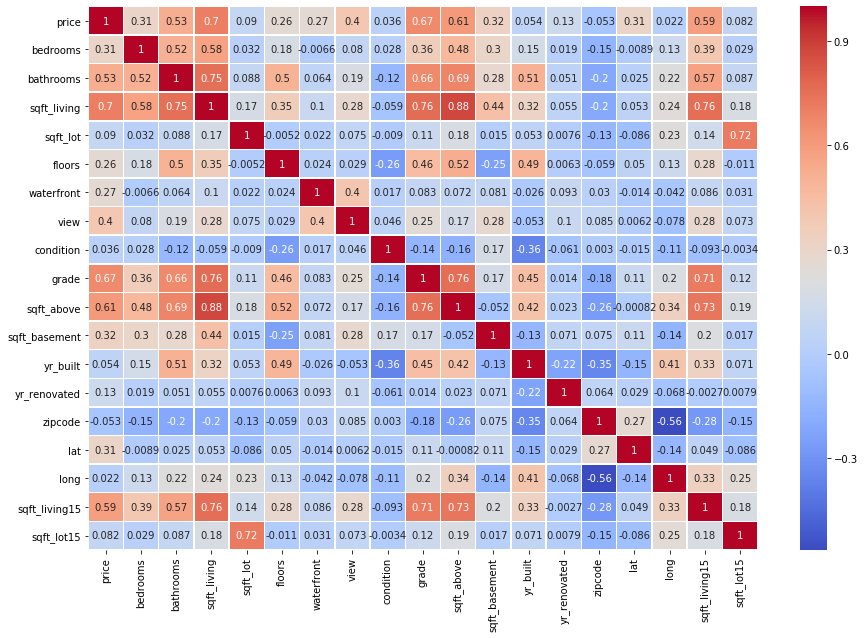

In [9]:
plt.figure(figsize=(15, 10))
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,
            linewidths=.5, cmap='coolwarm')

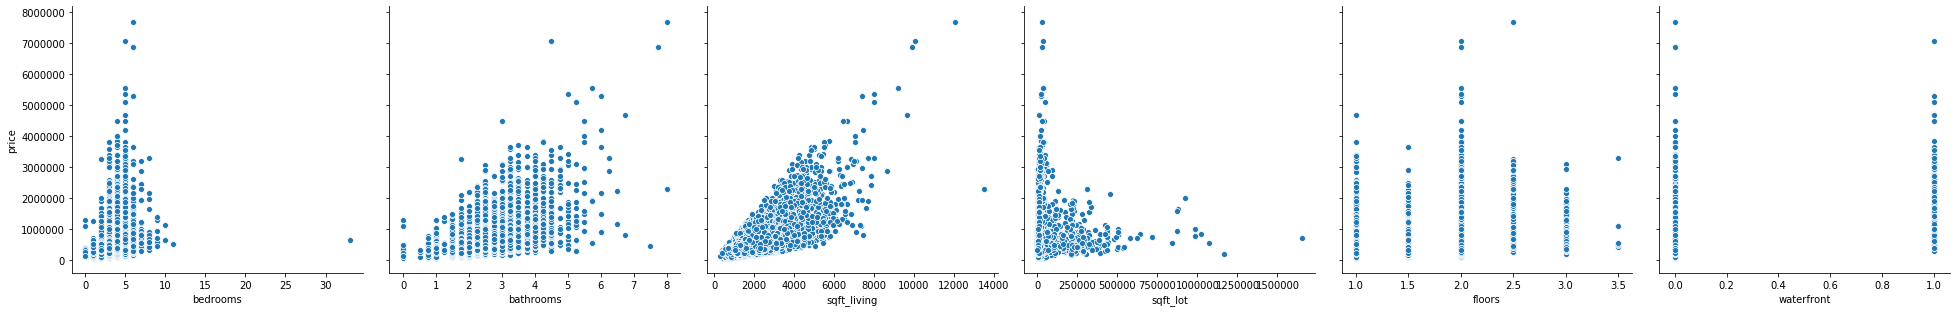

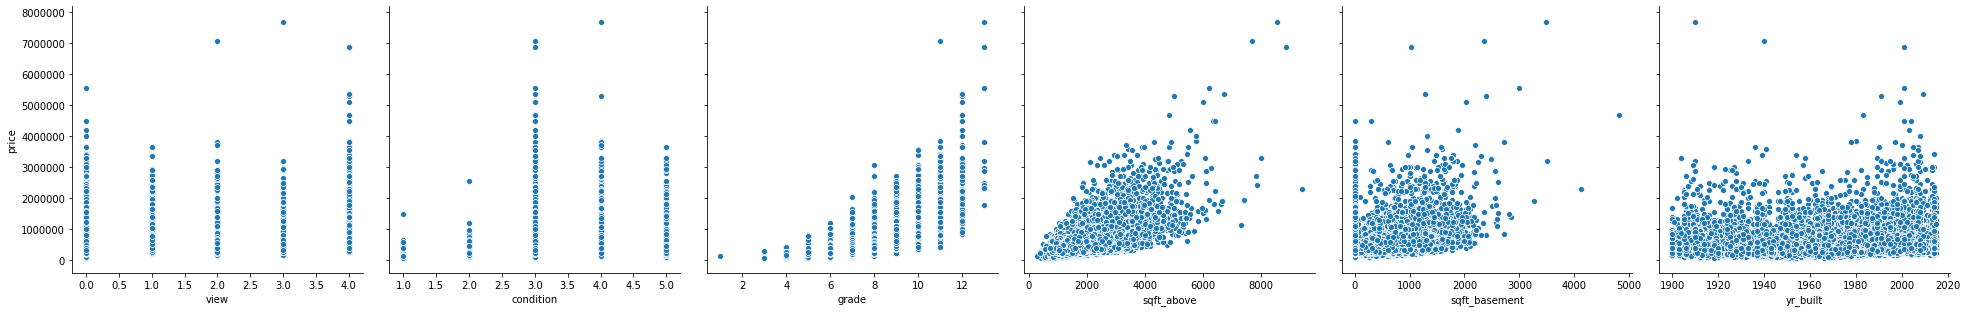

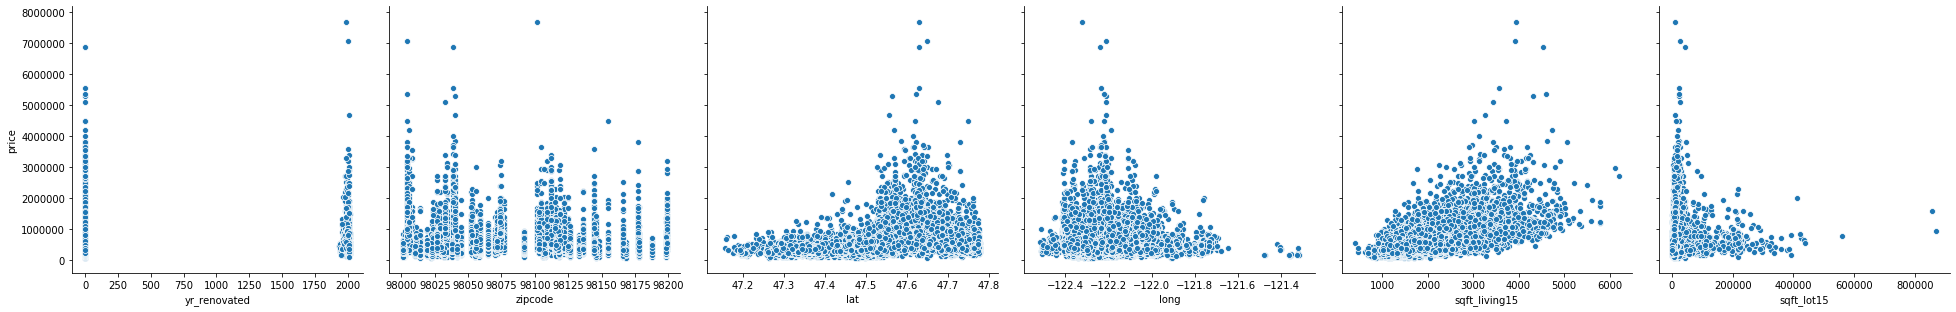

In [10]:
sns.pairplot(data, y_vars=['price'], x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
'waterfront'], size=4.5)

sns.pairplot(data, y_vars=['price'], x_vars=['view', 'condition', 'grade', 'sqft_above','sqft_basement', 
'yr_built'], size=4.5)

sns.pairplot(data, y_vars=['price'], x_vars=['yr_renovated', 'zipcode', 'lat', 'long','sqft_living15', 
'sqft_lot15'], size=4.5)

sns.set_style('darkgrid')

In [12]:
X = data.drop(['price'], axis=1)
y = data['price']

In [13]:
sc = preprocessing.StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
print(X_train.shape)
print(X_test.shape)

(15129, 18)
(6484, 18)


In [16]:
mae_scorer = make_scorer(mean_absolute_error)
mse_scorer = make_scorer(mean_squared_error)
r2_scorer = make_scorer(r2_score)
kfold = kfold = KFold(n_splits=10, random_state=101)

In [17]:
xgbr = XGBRegressor(objective = 'reg:squarederror')
xgbr.fit(X_train, y_train)

res_xgbr_mae = cross_val_score(xgbr, X_train, y_train, cv=kfold, scoring=mae_scorer)
mae_xgbr = round(res_xgbr_mae.mean(), 3)
print('XGBOOST MAE:\t',mae_xgbr)

res_xgbr_mse = cross_val_score(xgbr, X_train, y_train, cv=kfold, scoring=mse_scorer)
mse_xgbr = round(res_xgbr_mse.mean(), 3)
print('XGBOOST MSE:\t',mse_xgbr)

res_xgbr_r2 = cross_val_score(xgbr, X_train, y_train, cv=kfold, scoring=r2_scorer)
r2_xgbr = round(res_xgbr_r2.mean(), 3)
print('XGBOOST MSE:\t',r2_xgbr)

XGBOOST MAE:	 78510.359
XGBOOST MSE:	 19209209598.136
XGBOOST MSE:	 0.855


In [18]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

res_tree_mae = cross_val_score(tree, X_train, y_train, cv=kfold, scoring=mae_scorer)
mae_tree = round(res_tree_mae.mean(), 3)
print('DECISION TREE MAE :\t',mae_tree)

res_tree_mse = cross_val_score(tree, X_train, y_train, cv=kfold, scoring=mse_scorer)
mse_tree = round(res_tree_mse.mean(), 3)
print('DECISION TREE MSE:\t',mse_tree)

res_tree_r2 = cross_val_score(tree, X_train, y_train, cv=kfold, scoring=r2_scorer)
r2_tree = round(res_tree_r2.mean(), 3)
print('DECISION TREE R2 :\t',r2_tree)

DECISION TREE MAE :	 100552.835
DECISION TREE MSE:	 38277118993.1
DECISION TREE R2 :	 0.722


In [19]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

res_forest_mae = cross_val_score(forest, X_train, y_train, cv=kfold, scoring=mae_scorer)
mae_forest = round(res_forest_mae.mean(), 3)
print('RANDOM FOREST MAE :\t',mae_forest)

res_forest_mse = cross_val_score(forest, X_train, y_train, cv=kfold, scoring=mse_scorer)
mse_forest = round(res_forest_mse.mean(), 3)
print('RANDOM FOREST MSE:\t',mse_forest)

res_forest_r2 = cross_val_score(forest, X_train, y_train, cv=kfold, scoring=r2_scorer)
r2_forest = round(res_forest_r2.mean(), 3)
print('RANDOM FOREST  R2 :\t',r2_forest)

RANDOM FOREST MAE :	 75344.315
RANDOM FOREST MSE:	 19322473310.948
RANDOM FOREST  R2 :	 0.848


In [20]:
n_estimators = range(10, 400, 10)
max_features = ['auto', 'sqrt']
max_depth = range(10, 200, 10)
min_samples_split = range(2, 11)
min_samples_leaf = [2, 4, 6, 8, 10]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [21]:
forest_tuning = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=101, n_jobs = -1)
forest_tuning.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [22]:
parameters = forest_tuning.best_params_
print(parameters)

{'n_estimators': 190, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 180, 'bootstrap': False}


In [23]:
forest = RandomForestRegressor(n_estimators = 190,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth = 180,
 bootstrap = False)

forest.fit(X_train, y_train)

res_forest_mae = cross_val_score(forest, X_train, y_train, cv=kfold, scoring=mae_scorer)
mae_forest = round(res_forest_mae.mean(), 3)
print('RANDOM FOREST MAE :\t',mae_forest)

res_forest_mse = cross_val_score(forest, X_train, y_train, cv=kfold, scoring=mse_scorer)
mse_forest = round(res_forest_mse.mean(), 3)
print('RANDOM FOREST MSE:\t',mse_forest)

res_forest_r2 = cross_val_score(forest, X_train, y_train, cv=kfold, scoring=r2_scorer)
r2_forest = round(res_forest_r2.mean(), 3)
print('RANDOM FOREST  R2 :\t',r2_forest)

RANDOM FOREST MAE :	 71447.993
RANDOM FOREST MSE:	 18104842801.146
RANDOM FOREST  R2 :	 0.864


In [24]:
n_estimators = range(10, 400, 10)
max_depth = range(10, 200, 10)
min_child_weight = range(10)
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight}

In [25]:
xgbr_tuning = RandomizedSearchCV(estimator = xgbr, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=101, n_jobs = -1)
xgbr_tuning.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 89.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
            

In [26]:
xgbr_tuning.best_params_

{'n_estimators': 50, 'min_child_weight': 8, 'max_depth': 10}

In [28]:
xgbr = XGBRegressor(objective = 'reg:squarederror', n_estimators=50, min_child_weight=8, max_depth=10)
xgbr.fit(X_train, y_train)

res_xgbr_mae = cross_val_score(xgbr, X_train, y_train, cv=kfold, scoring=mae_scorer)
mae_xgbr = round(res_xgbr_mae.mean(), 3)
print('XGBOOST MAE:\t',mae_xgbr)

res_xgbr_mse = cross_val_score(xgbr, X_train, y_train, cv=kfold, scoring=mse_scorer)
mse_xgbr = round(res_xgbr_mse.mean(), 3)
print('XGBOOST MSE:\t',mse_xgbr)

res_xgbr_r2 = cross_val_score(xgbr, X_train, y_train, cv=kfold, scoring=r2_scorer)
r2_xgbr = round(res_xgbr_r2.mean(), 3)
print('XGBOOST MSE:\t',r2_xgbr)

XGBOOST MAE:	 67133.013
XGBOOST MSE:	 16268941433.302
XGBOOST MSE:	 0.878


In [29]:
y_pred_xbgr = xgbr.predict(X_test)
pred_mae = mean_absolute_error(y_test,y_pred_xbgr)
pred_mse = mean_squared_error(y_test,y_pred_xbgr) 
pred_r2 = r2_score(y_test,y_pred_xbgr)  
print('MAE: ',pred_mae)
print('MSE: ',pred_mse)
print('R2: ',pred_r2)

MAE:  66327.91354198797
MSE:  14929157820.859291
R2:  0.8935721385315625


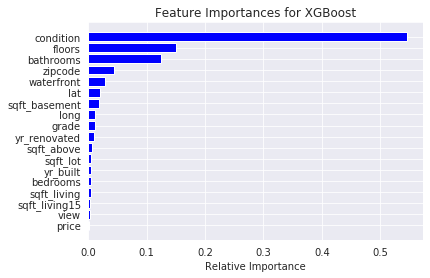

In [30]:
xgbr_features = data.columns.values.tolist()
importances = xgbr.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances for XGBoost')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [xgbr_features[i] for i in indices])
plt.xlabel('Relative Importance')
sns.set_style('darkgrid')
plt.show()

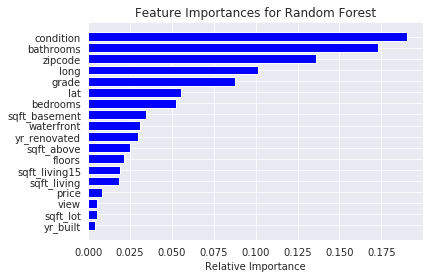

In [32]:
forest_features = data.columns.values.tolist()
importances = forest.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances for Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [forest_features[i] for i in indices])
plt.xlabel('Relative Importance')
sns.set_style('darkgrid')
plt.show()